## **SHIFTKEY x ACENET: Machine Learning Basics**
**Module 2: Implementations of Machine Learning -- Regression**




Here we will be doing a classification analysis on a generated dataset that represents the phytoplankton concentration in the ocean.

Read about phytopanton here:

https://en.wikipedia.org/wiki/Phytoplankton

The features that were generated to calculate this concentration are:

- sea surface temperature
- nutrient levels
- sunlight hours

These variables are generated by a normal distribution, a gamma distribution, and a normal distribution, respectively.

There are then added together in the form:

$\text{phytoplankton concentration} = \sin(\text{sea surface temperature}) + (\text{nutrient levels})^2 + e^{\text{sunlight hours}}$

These distributions and the equation were arbitrarily designed to show how different regression methods work. I encourage you to mess around with these, change up the distributions etc and see how the analysis may change.

In [1]:
# IMPORT DATA

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

The analysis demonstrates how to use machine learning, specifically deep learning with PyTorch, to model and predict phytoplankton concentration based on oceanographic variables, showcasing a non-linear relationship.

We are going to generate data with a non-linear relationship and add noise.

In [2]:
# generate synthetic data with a non-linear relationship
np.random.seed(1997)

num_samples = 10000

def generate_data(n):
    # # I encourage you to mess around with the values for these distributions or even try different distributions, for example a normal/gaussian?
    # sst = np.random.uniform(10, 30, n)  # sea surface temperature (°c)
    # nutrient_levels = np.random.uniform(0.5, 3.0, n)  # nutrient levels (arbitrary units)
    # sunlight_hours = np.random.uniform(8, 16, n)  # daily sunlight hours

    sst = np.random.normal(loc=25, scale=5, size=n)  # Normal distribution for sea surface temperature
    nutrient_levels = np.random.gamma(shape=2, scale=1, size=n)  # Gamma distribution for nutrient levels
    sunlight_hours = np.random.normal(loc=12, scale=2, size=n)

    # Ensure all data is within realistic bounds
    sst = np.clip(sst, 10, 40)  # Clip SST values to be within realistic range, e.g., 10°C to 30°C
    # nutrient_levels = np.clip(nutrient_levels, 0.5, 3.0)  # Clip nutrient levels to a reasonable range
    sunlight_hours = np.clip(sunlight_hours, 6, 16)

    # # non-linear relation: phytoplankton concentration (sinx, x, x)
    # phyto_concentration = (
    #     2.5 * sst + 
    #     10 * np.sin(0.3 * sst) + 
    #     6 * nutrient_levels + 
    #     (-3.5) * sunlight_hours + 
    #     np.random.normal(0, 3, n)
    # ) + 50

    # more non-linear relation: phytoplankton concentration (sinx, x^2, e^x)
    phyto_concentration = (
        2.5 * sst + 
        10 * np.sin(0.3 * sst) + 
        10 * 6 * np.power((1/6**2) *nutrient_levels,2) + 
        (-3.5) * np.exp((1/np.exp(3.5))*sunlight_hours) + 
        np.random.normal(0, 3, n)
    ) + 50

    # stack features together
    X = np.vstack((sst, nutrient_levels, sunlight_hours)).T
    y = phyto_concentration.reshape(-1, 1)

    return(X,y,sst,nutrient_levels,sunlight_hours,phyto_concentration)

X,y,sst,nutrient_levels,sunlight_hours,phyto_concentration = generate_data(num_samples)

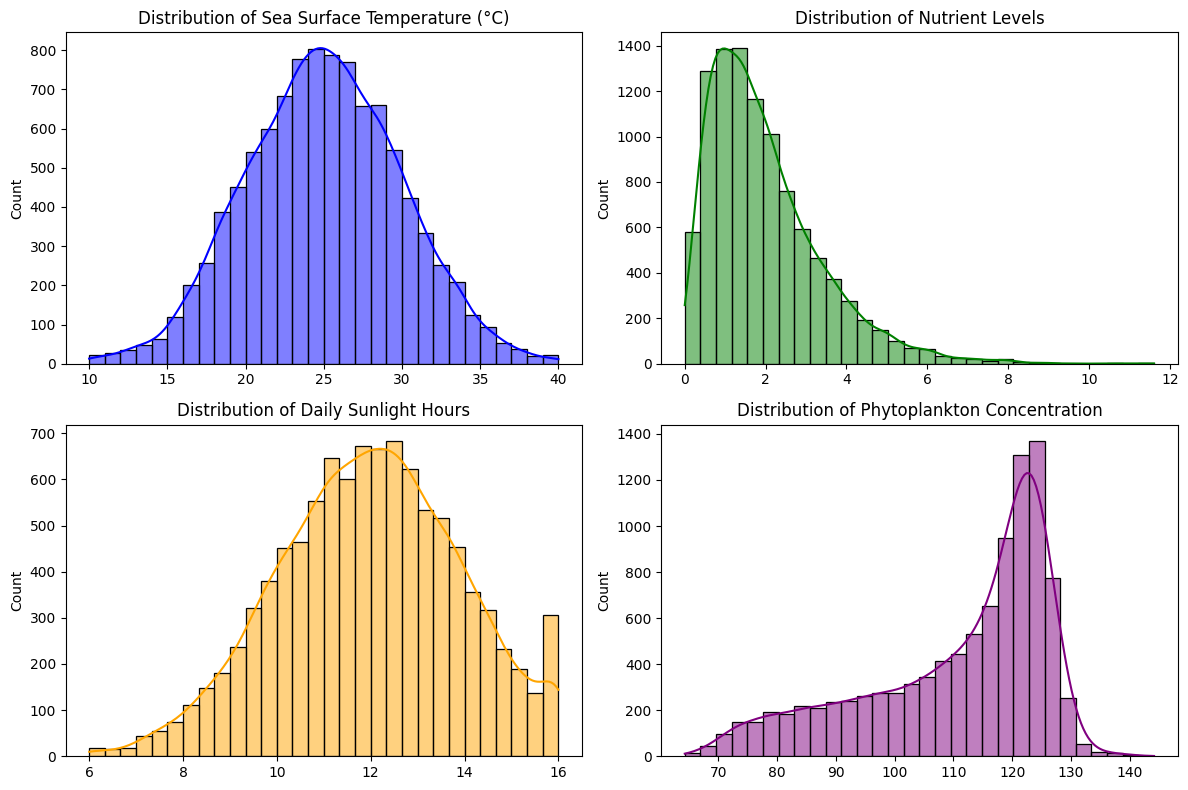

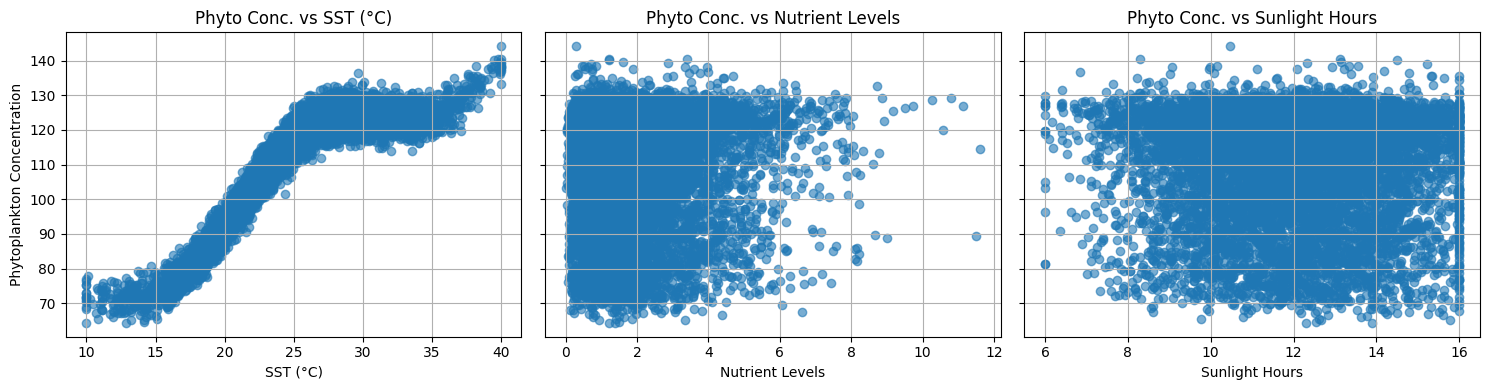

In [3]:
# let's plot the distributions of the data we generated. always do this!!

# set up the figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# plot the distributions
sns.histplot(sst, bins=30, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribution of Sea Surface Temperature (°C)")

sns.histplot(nutrient_levels, bins=30, kde=True, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Distribution of Nutrient Levels")

sns.histplot(sunlight_hours, bins=30, kde=True, ax=axes[1, 0], color="orange")
axes[1, 0].set_title("Distribution of Daily Sunlight Hours")

sns.histplot(phyto_concentration, bins=30, kde=True, ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Distribution of Phytoplankton Concentration")

# adjust layout
plt.tight_layout()
plt.show()

feature_names = ['SST (°C)', 'Nutrient Levels', 'Sunlight Hours']
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for i in range(X.shape[1]):
    axes[i].scatter(X[:, i], y, alpha=0.6)
    axes[i].set_xlabel(feature_names[i])
    axes[i].set_title(f'Phyto Conc. vs {feature_names[i]}')
    axes[i].grid(True)

axes[0].set_ylabel('Phytoplankton Concentration')
plt.tight_layout()
plt.show()

## REMEMBER TO SPLIT YOUR DATA (why? think about it)

In [4]:
# split into training and testing sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Here we do the data preprocessing. This is where you would deal with empty data entries with imputation (imputation = replacing missing values).

Read about imputation:

https://scikit-learn.org/stable/modules/impute.html

You also scale the data.

Read about scaling:

https://scikit-learn.org/stable/modules/preprocessing.html

And when you use a PyTorch neural network, you must convert your NumPy arrays into PyTorch tensors. These are just yet another different type of data type. For one these are called tensors, but they aren't actually tensors like the ones we talk about in differential geometry or general relativity. Similar to now NumPy arrays are an extension of Python lists to make computations more efficient, PyTorch tensors are an extension of NumPy arrays to make computations with neural networks more efficient.


In [5]:
# DATA PREPROCESSING

# # standardize features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [6]:
# DEFINE MODEL

# model = LinearRegression()
model = RandomForestRegressor()

In [7]:
# fit model
model.fit(X_train,y_train)

/Users/akshayghosh/acenet_py/deep_learning/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [8]:
# make predictions on X_val

y_val_pred = model.predict(X_val)

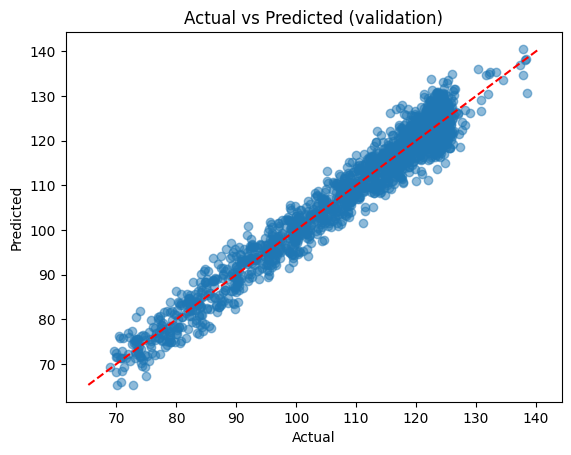

Validation RMSE: 3.1904558454712544
Validation R2 Score: 0.9581259097640425


In [9]:
# evaluate model performance

plt.figure()
plt.scatter(y_val_pred, y_val, alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='red')
plt.title("Actual vs Predicted (validation)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# calculate mean squared error, this tells us the average squared difference between the predicted and true values. so let's take the square root
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred)) # root mean squared error

# r^2 tells us how well the model explains the variance in the data. an r^2 of 1 is a perfect correlation and a r^2 of  0 is no correlation
val_r2 = r2_score(y_val, y_val_pred)

# print out the metrics we just calculated
print(f"Validation RMSE: {val_rmse}") # this number is very large so we print the log10 of it
print(f"Validation R2 Score: {val_r2}")

predicting 2000 samples


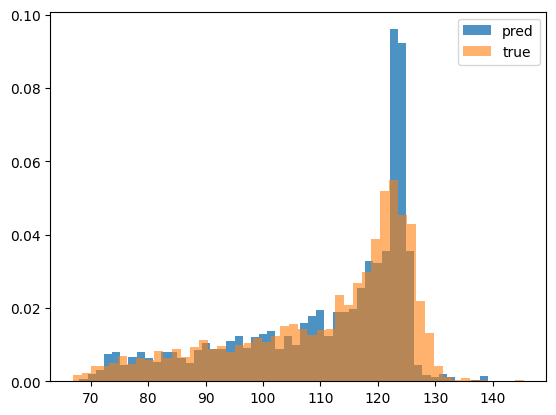

In [10]:
# X_test,y_test,nutrient_levels_,sunlight_hours_,phyto_concentration_ = generate_data(200)

np.random.seed(2025)
num_test_samples = int(0.2*num_samples)
print(f'predicting {num_test_samples} samples')
X_test,y_test,sst_test,nutrient_levels_test,sunlight_hours_test,phyto_concentration_test = generate_data(num_test_samples)

X_test = scaler.transform(X_test) # apply the datapreprocessing

# use model
y_test_pred = model.predict(X_test)

# calculate evaluation metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

plt.figure()
plt.hist(y_test_pred,bins = 50,alpha = 0.8,density = True, label = 'pred')
plt.hist(y_test,bins = 50,alpha = 0.6,density = True, label = 'true')
plt.legend()
plt.show()

Now we visualize our results and look at the performance metrics.

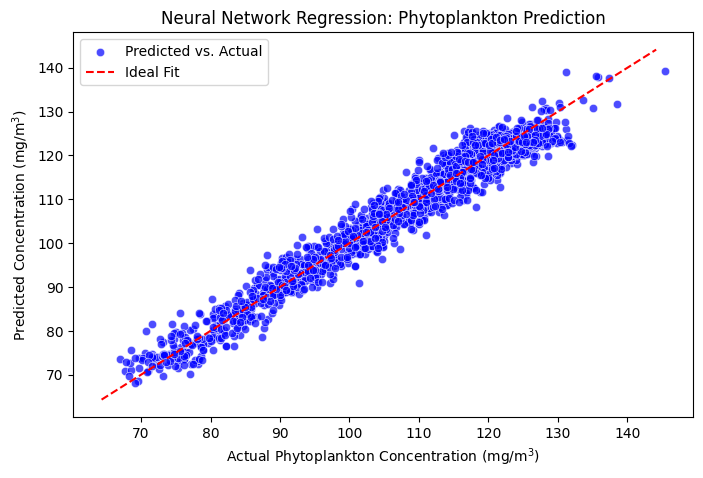

test mse: 9.65
test r^2 score: 0.96


In [11]:
# visualization
plt.figure(figsize=(8, 5))
# sns.scatterplot(x=y_test.flatten(), y=test_predictions.flatten(), label="Predicted vs. Actual", color="blue", alpha=0.7)
sns.scatterplot(x=y_test.flatten(), y=y_test_pred.flatten(), label="Predicted vs. Actual", color="blue", alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel(r"Actual Phytoplankton Concentration (mg/m$^3$)")
plt.ylabel(r"Predicted Concentration (mg/m$^3$)")
plt.title("Neural Network Regression: Phytoplankton Prediction")
plt.legend()
plt.show()

# print evaluation metrics
print(f"test mse: {test_mse:.2f}")
print(f"test r^2 score: {test_r2:.2f}")

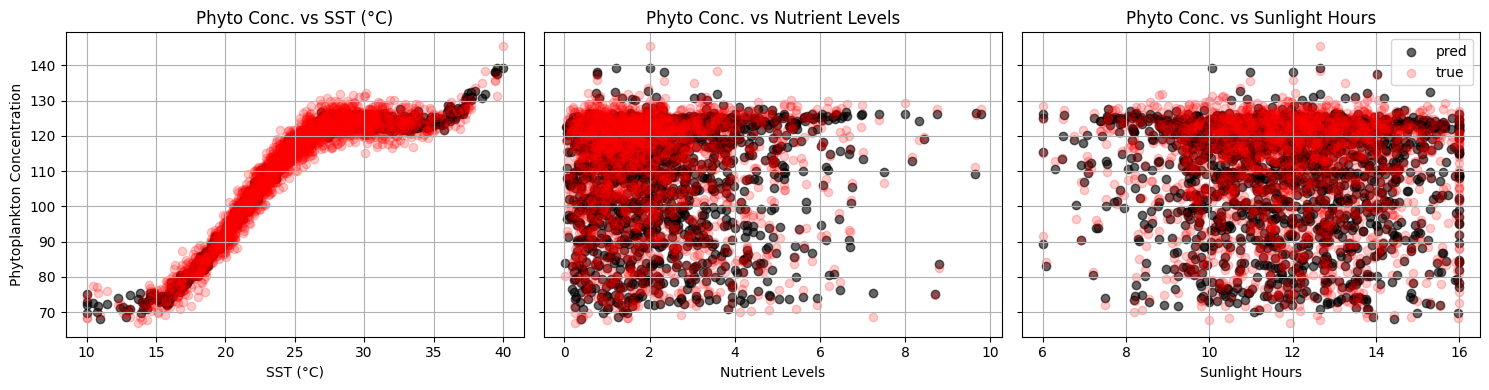

In [12]:
feature_names = ['SST (°C)', 'Nutrient Levels', 'Sunlight Hours']
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

# X_test_plot = X_test
X_test_plot = scaler.inverse_transform(X_test)

for i in range(X.shape[1]):
    axes[i].scatter(X_test_plot[:, i], y_test_pred, alpha=0.6, c = 'k',label = 'pred')
    axes[i].scatter(X_test_plot[:, i], y_test, alpha=0.2,c = 'r', label = 'true')
    axes[i].set_xlabel(feature_names[i])
    axes[i].set_title(f'Phyto Conc. vs {feature_names[i]}')
    axes[i].grid(True)

axes[0].set_ylabel('Phytoplankton Concentration')
plt.tight_layout()
plt.legend()
plt.show()